In [1]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.08670264780833303 #0.13949636660880768 
volatility=0.013928489964789946 #0.017793899652989272
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
K=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]

In [2]:
from joblib import load, Parallel, delayed, cpu_count, dump
import seaborn as sns
import time
EPE = load('./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib')
ENE = load('./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib')
# def worker(Te):
#     return Te, HW.swaption(0,Te,S,T,K, payer=False)
# AnalyticalNESwap10Y = Parallel(n_jobs=cpu_count())(delayed(worker)(Te) for Te in np.arange(0,10+1/365,1/365))
# dump(AnalyticalNESwap10Y, './SimulationData/AnalyticalNESwap10Y.joblib')

In [3]:
PE=load('./SimulationData/AnalyticalPESwap10Y.joblib')
NE=load('./SimulationData/AnalyticalNESwap10Y.joblib')

<Axes: >

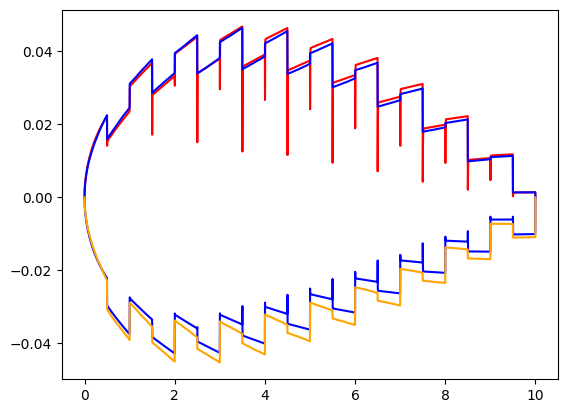

In [24]:
discounting = np.array([HW.ZCB(0,Te) for Te in np.arange(0,10+1/365,1/365)])
time = np.arange(0,10+1/365,1/365)
time2 = np.arange(0,10+2/365,2/365)
sns.lineplot(x=time,y=PE, color ="red")
sns.lineplot(x=time,y=NE, color ="blue")
sns.lineplot(x=time,y=discounting*np.array(EPE), color='blue')
sns.lineplot(x=time,y=discounting*np.array(ENE), color='orange')


In [32]:
# HW.swaption(0,1-1/365,S,T,K, payer=True)

In [29]:
HW.swaption(0,1.5,S,T,K, payer=True)

0.03687052748547837

In [31]:
# HW.swaption(0,1.5+1/365,S,T,K, payer=True)

In [27]:
np.arange(0,10+1/365,1/365)[366]-1/365

1.0

<Axes: >

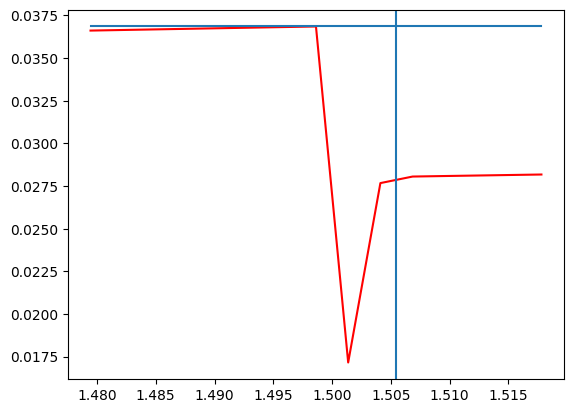

In [72]:
sns.lineplot(x=time[int(360*1.5):int(370*1.5)],y=PE[int(360*1.5):int(370*1.5)], color ="red").axvline(1.5+2/365)
sns.lineplot(x=time[int(360*1.5):int(370*1.5)], y=np.repeat(PE[547],len(time[int(360*1.5):int(370*1.5)]) ))

In [14]:
from defaultCurves import *
CVA(time,1000065, PE)*1000000,CVA(time, 1,discounting*EPE)*1000000

(-6013.497771913137, -6037.016137340966)

In [31]:
1091604/100000000,1119629/100000000

(0.01091604, 0.01119629)

In [29]:
DVA(time,1000065, NE),DVA(time, 1,discounting*ENE)

(0.0035826389785474054, 0.00392382881360251)

<Axes: >

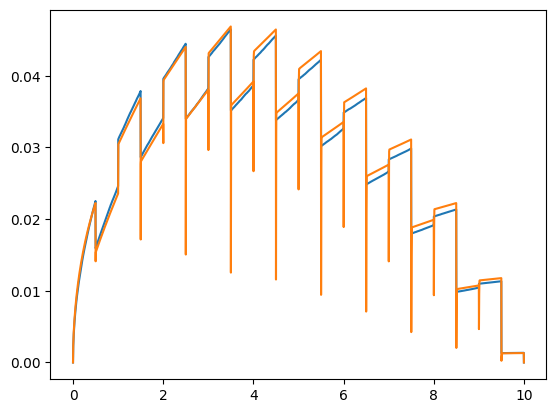

In [18]:
sns.lineplot(x=time, y=discounting*EPE)
sns.lineplot(x=time, y=PE)

In [81]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [87]:
-np.array([1+0.062,1-0.062])*5421.21

array([-5757.32502, -5085.09498])

In [81]:
1/365*365==int(1/365*365)

True

In [12]:
from scipy.integrate import quad
intervals = np.linspace(0,10,cpu_count())
# quad(lambda x: HW.swaption(0,x,S,T,K), 0, 10)
def worker(a,b):
    return quad(lambda x: HW.swaption(0,x,S,T,K), a, b, epsabs=1e-4, epsrel=1e-4)

# result = Parallel(n_jobs=cpu_count())(delayed(worker)(intervals[i], intervals[i+1]) for i in range(len(intervals)-1))

In [14]:
worker(10/16,20/16)[0]

c:\Users\Shark\OneDrive\Desktop\MasterThesis\.venv\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.015714902020139726

In [12]:
for i in range(len(intervals)-1):
    print(intervals[i],intervals[i+1])

0.0 0.6666666666666666
0.6666666666666666 1.3333333333333333
1.3333333333333333 2.0
2.0 2.6666666666666665
2.6666666666666665 3.333333333333333
3.333333333333333 4.0
4.0 4.666666666666666
4.666666666666666 5.333333333333333
5.333333333333333 6.0
6.0 6.666666666666666
6.666666666666666 7.333333333333333
7.333333333333333 8.0
8.0 8.666666666666666
8.666666666666666 9.333333333333332
9.333333333333332 10.0
